In [92]:
# import des librairies
import numpy as np
import pandas as pd

# preprocessing 
import re

# Visualisations
import plotly as px
import plotly.graph_objects as go

In [80]:
# import des données
df = pd.read_csv("../data/silver/silver_data.csv")
df.head()

,jobs,description,loc,datePosted,workhours,salary,contract_type,experience,diploma,skills,qualifications,industry,company,size,company_description,tools,ID_dep,ville,date
0,Data Engineer sénior (F/H) CDI (H/F),"En tant que Data Engineer chez Quantmetry, vou...",75 - PARIS 08,Actualisé le 12 juillet 2023,38H Travail en journée,40000.0 - 50000.0,Contrat à durée indéterminée,5 ans,NaN,"concevoir et gérer un projet, concevoir un log...",Cadre,Conseil pour les affaires et autres conseils d...,QUANTMETRY,100 à 199 salariés,Pure player en Data et Intelligence Artificiel...,NaN,75,PARIS 08,2023/07/12
1,Data Consultant Stratégie Sénior (H/F),Nous recrutons des personnes avec une appétenc...,75 - PARIS 08,Actualisé le 12 juillet 2023,35H Travail en journée,3100.0 - 5000.0,Contrat à durée indéterminée,5 ans,NaN,"analyser les résultats d'un projet, décliner l...",Cadre,Conseil pour les affaires et autres conseils d...,QUANTMETRY,100 à 199 salariés,Pure player en Data et Intelligence Artificiel...,NaN,75,PARIS 08,2023/07/12
2,Chef de projets Performance Durable/Energie/Da...,Intégré(e) au sein de la Direction Performance...,92 - ASNIERES SUR SEINE,Actualisé le 13 juillet 2023,35H Travail en journée,NaN,Contrat à durée indéterminée,3 ans,NaN,contrôler et faire appliquer le respect de dis...,Employé qualifié,Activités des sièges sociaux,NEXITY,250 à 499 salariés,Nexity est aujourd hui leader sur les différen...,tableau,92,ASNIERES SUR SEINE,2023/07/13
3,Ingénieur Data H/F,"Vos missions\nAu sein de projets Agile Scrum, ...",66 - PERPIGNAN,Actualisé le 19 juillet 2023,35H Travail en journée,NaN,Contrat à durée indéterminée,5 ans,NaN,"concevoir et gérer un projet, concevoir un log...",Cadre,"Autres intermédiaires du commerce en denrées, ...",SOCIETE DE DISTRIBUTION DE PRODUITS MARA,100 à 199 salariés,"Azura, est un groupe familial, en forte croiss...","tableau, sas",66,PERPIGNAN,2023/07/19
4,Data Engineer pour la Qualité Totale H/F (H/F),Vous êtes Rattaché(e) au Responsable de l'équi...,92 - ST CLOUD,Actualisé le 19 juillet 2023,35H Travail en journée,38000.0 - 70000.0,Contrat à durée indéterminée,5 ans,NaN,"application web, déterminer des mesures correc...",Cadre,Activités des sièges sociaux,DASSAULT AVIATION,Non employeur (pas de salarié au cours de l'an...,Dassault Aviation,NaN,92,ST CLOUD,2023/07/19


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   jobs                 3299 non-null   object
 1   description          3299 non-null   object
 2   loc                  999 non-null    object
 3   datePosted           999 non-null    object
 4   workhours            604 non-null    object
 5   salary               487 non-null    object
 6   contract_type        3299 non-null   object
 7   experience           3299 non-null   object
 8   diploma              116 non-null    object
 9   skills               280 non-null    object
 10  qualifications       1545 non-null   object
 11  industry             1633 non-null   object
 12  company              1743 non-null   object
 13  size                 2171 non-null   object
 14  company_description  1817 non-null   object
 15  tools                1673 non-null   object
 16  ID_dep

## Preprocessing

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [82]:
def add_contract_type(df):
    df["contract_type"] = df["contract_type"].str.replace('contrat à durée indéterminée', 'CDI', flags=re.IGNORECASE)
    df["contract_type"] = df["contract_type"].str.replace('contrat à durée déterminée', 'CDD', flags=re.IGNORECASE)

    def extract_duration(row):
        match = re.search(r'(\d+\s*\D+)', row['contract_type'])
        if match:
            return match.group(1).strip()
        else:
            if 'CDI' in row['contract_type']:
                return 'Indéterminé'
            else:
                return 'non renseignée'

    df['contract_type_duration'] = df.apply(extract_duration, axis=1)

    def get_contract_label(contract):
        if re.search(r'CDI', contract, re.IGNORECASE):
            return 'CDI'
        elif re.search(r'CDD', contract, re.IGNORECASE):
            return 'CDD'
        elif re.search(r'intérim|intérimaire', contract, re.IGNORECASE):
            return 'Mission intérimaire'
        elif re.search(r'Franchise', contract, re.IGNORECASE):
            return 'Franchise'
        elif re.search(r'profession libérale', contract, re.IGNORECASE):
            return 'Profession libérale'
        return None

    df['contract_type_label'] = df['contract_type'].apply(get_contract_label)
    
    def get_contract_number(contract):
        if 'CDI' in contract:
            return 1
        elif 'CDD' in contract:
            return 2
        elif 'Mission intérimaire' in contract:
            return 3
        elif 'Franchise' in contract:
            return 5
        elif 'Profession libérale' in contract:
            return 6
        return None

    df['contract_type_number'] = df['contract_type_label'].apply(get_contract_number)

    return df

In [83]:
df = add_contract_type(df)

## KPI

In [126]:
# total d'offres d'emploi 
total_offres_emploi = df['jobs'].count()
total_offres_emploi

3299

In [128]:
last_date_offer = df["date"].max().strftime('%Y-%m-%d')
last_date_offer

'2023-08-31'

In [130]:
total_company = df["company"].nunique()
total_company

715

## Visualisations


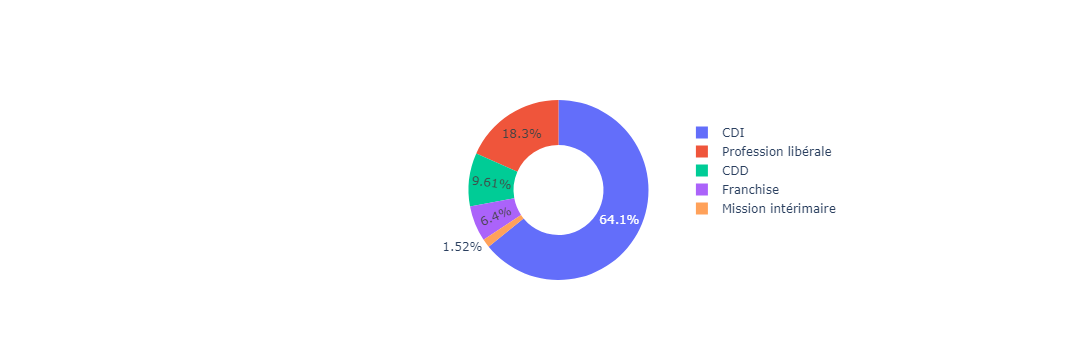

In [109]:
# Pie chart de la proportion d'offre d'emploi par type de contrat
counts = df["contract_type_label"].value_counts()

fig = go.Figure(data=[go.Pie(labels=counts.index,
                             values=counts.values,
                             hole=0.5)])

fig.update_layout(legend=dict(x=0.7, y=0.9))

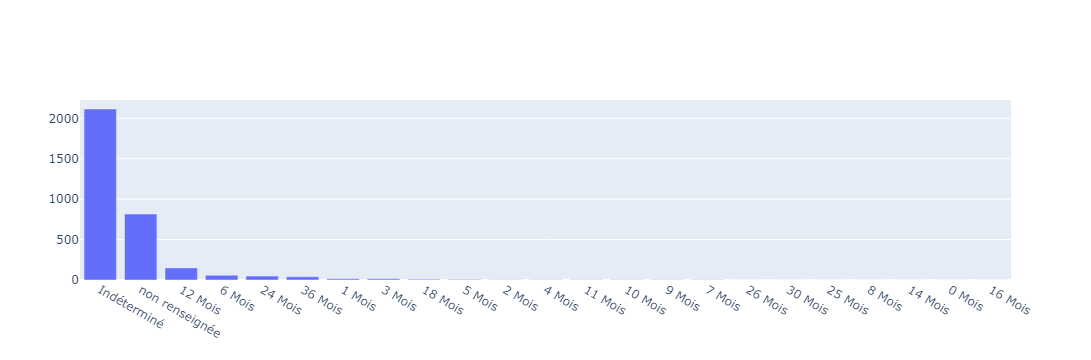

In [114]:
# bar plot Total d'offre d'emploi par durée du poste
counts = df["contract_type_duration"].value_counts()

fig = go.Figure(data=[go.Bar(x=counts.index,
                             y=counts.values)])

fig.update_layout(legend=dict(x=0.7, y=0.9))

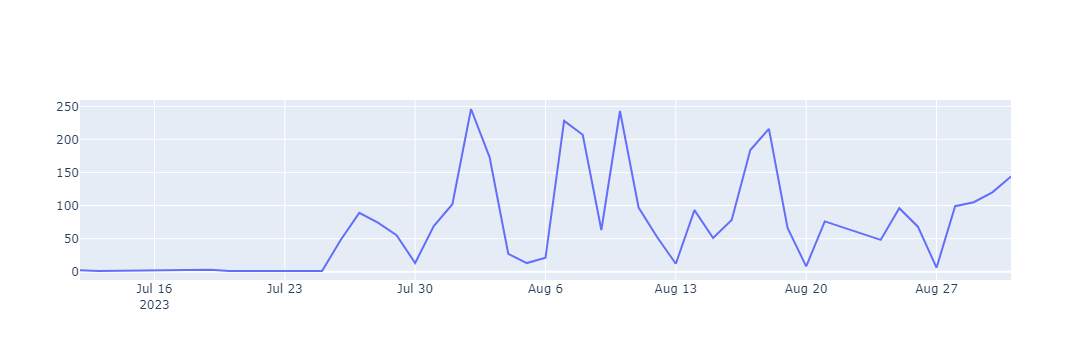

In [131]:
# lineplot du Total d'offre d'emploi par jours
counts = df["date"].value_counts().sort_index()

fig = go.Figure(data=[go.Scatter(x=counts.index,
                                 y=counts.values,
                                 mode='lines')])

fig.update_layout(legend=dict(x=0.7, y=0.9))

fig.show()

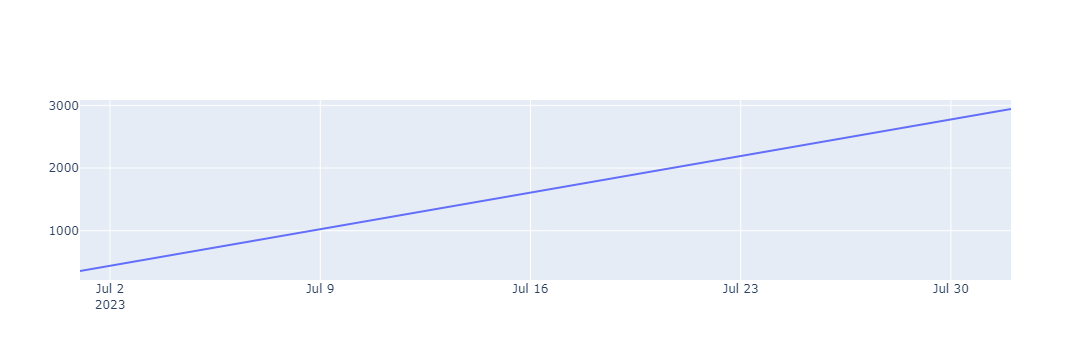

In [123]:
monthly_counts = df.groupby(df['date'].dt.to_period("M")).size()

fig = go.Figure(data=[go.Scatter(x=monthly_counts.index.astype(str),
                                 y=monthly_counts.values,
                                 mode='lines')])

fig.show()

## Export df

In [132]:
df.to_csv('../data/silver/gold_data.csv')